In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/dtaset.csv')

FileNotFoundError: ignored

In [ ]:
data.head(
)

,SL.,Comment,Hate,Type
0,1,Kanki ki der Allah sob samoy valo rake,Yes,Others
1,2,khanki akta,Yes,Sexual
2,3,Ore saniliyon,Yes,Sexual
3,4,Bokachoda Shangbadik,Yes,Slang
4,5,Balda dekhaiche,Yes,Slang


In [ ]:
data['Comment'] = data['Comment'].str.lower()

In [ ]:
data.head()

,SL.,Comment,Hate,Type
0,1,kanki ki der allah sob samoy valo rake,Yes,Others
1,2,khanki akta,Yes,Sexual
2,3,ore saniliyon,Yes,Sexual
3,4,bokachoda shangbadik,Yes,Slang
4,5,balda dekhaiche,Yes,Slang


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

data['Hate'] = label_encoder.fit_transform(data['Hate'])

In [ ]:
data['Type'] = label_encoder.fit_transform(data['Type'])

In [ ]:
data.head()

,SL.,Comment,Hate,Type
0,1,Kanki ki der Allah sob samoy valo rake,1,2
1,2,khanki akta,1,5
2,3,Ore saniliyon,1,5
3,4,Bokachoda Shangbadik,1,6
4,5,Balda dekhaiche,1,6


In [ ]:
import pandas as pd
from nltk.corpus import stopwords


custom_stopwords = ['ki', 'e', 'ei', 'r', 'ar', 'ni', 'er', 'a', 'but', 'k', 'to', 'o', 'ai', 'by', 'the', 'way', 'kn', 'ta', 'ke', 're', 'ra', 'or']

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

data['Comment'] = data['Comment'].apply(remove_stopwords)



In [ ]:
data.head(

)

,SL.,Comment,Hate,Type
0,1,Kanki der Allah sob samoy valo rake,1,2
1,2,khanki akta,1,5
2,3,Ore saniliyon,1,5
3,4,Bokachoda Shangbadik,1,6
4,5,Balda dekhaiche,1,6


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
comments = data['Comment'].values
hate_labels = data['Hate'].values
type_labels = data['Type'].values


In [ ]:
hate_labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)
comment_sequences = tokenizer.texts_to_sequences(comments)

max_sequence_length = 85

comment_sequences = pad_sequences(comment_sequences, maxlen=max_sequence_length)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)
comment_sequences = tokenizer.texts_to_sequences(comments)


for i in range(len(comments)):
    print(f"Original Comment: {comments[i]}")
    print(f"Tokenized Sequence: {comment_sequences[i]}")
    print("\n")

max_sequence_length = 85
comment_sequences = pad_sequences(comment_sequences, maxlen=max_sequence_length)


Streaming output truncated to the last 5000 lines.
Original Comment: na dada , tiple esob jinis bare na
Tokenized Sequence: [1, 288, 9179, 369, 467, 867, 1]


Original Comment: tahole ami tipe dim ne, dikho dada boro hoibo
Tokenized Sequence: [113, 4, 1750, 349, 1101, 9180, 288, 18, 454]


Original Comment: taito torta jhoira porse
Tokenized Sequence: [9181, 9182, 9183, 611]


Original Comment: 2 pahare jokhn aksathe bari khay
Tokenized Sequence: [166, 3865, 3866, 9184, 751, 574]


Original Comment: tiktok nh thakle bujtam nh je bd te atto abal cho...a ache
Tokenized Sequence: [367, 135, 143, 9185, 135, 46, 344, 25, 608, 235, 9186, 1022, 74]


Original Comment: ganta sone onek haslam
Tokenized Sequence: [3863, 9187, 56, 1678]


Original Comment: kothar majhe jokhn lal pipra jayga moto kamor dey tokhn obostha
Tokenized Sequence: [1837, 1098, 3866, 629, 2337, 2352, 16, 1208, 264, 3096, 383]


Original Comment: sob gaja khor obaber dine ogore gaja dilo
Tokenized Sequence: [8, 421, 1007, 9

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(comment_sequences,hate_labels, test_size=0.1, random_state=42)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=1200, learning_rate=0.2,max_depth=1, random_state=42)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.61

In [ ]:
model.score(xtrain,ytrain)

0.6808421052631579

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=2000, learning_rate=0.03, max_depth=11, random_state=42)
xgb_model.fit(xtrain,ytrain)
xgb_model.score(xtest,ytest)

0.632

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

[LightGBM] [Info] Number of positive: 2556, number of negative: 1944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4449
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568000 -> initscore=0.273696
[LightGBM] [Info] Start training from score 0.273696


0.644

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
gnb.score(xtest,ytest)

0.558

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 85, 100)           1063400   
                                                                 
 bidirectional_10 (Bidirect  (None, 85, 1024)          2510848   
 ional)                                                          
                                                                 
 bidirectional_11 (Bidirect  (None, 512)               2623488   
 ional)                                                          
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6230633 (23.77 MB)
Trainable params: 623

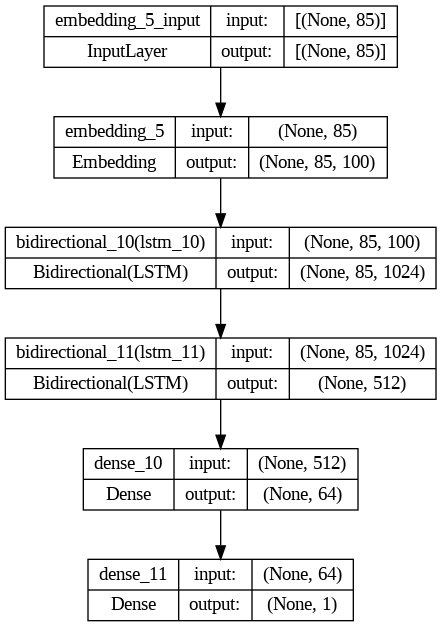

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)



In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adafactor(1e-3), metrics=['accuracy'])
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=30, batch_size=4)

Epoch 1/30
1125/1125 [==============================] - 63s 48ms/step - loss: 0.6842 - accuracy: 0.5673 - val_loss: 0.6808 - val_accuracy: 0.5600
Epoch 2/30
1125/1125 [==============================] - 35s 31ms/step - loss: 0.6395 - accuracy: 0.6233 - val_loss: 0.6067 - val_accuracy: 0.6820
Epoch 3/30
1125/1125 [==============================] - 31s 28ms/step - loss: 0.5005 - accuracy: 0.7564 - val_loss: 0.5612 - val_accuracy: 0.7020
Epoch 4/30
1125/1125 [==============================] - 32s 28ms/step - loss: 0.4110 - accuracy: 0.8189 - val_loss: 0.6596 - val_accuracy: 0.6660
Epoch 5/30
1125/1125 [==============================] - 32s 29ms/step - loss: 0.3156 - accuracy: 0.8691 - val_loss: 0.6586 - val_accuracy: 0.7220
Epoch 6/30
1125/1125 [==============================] - 32s 29ms/step - loss: 0.2372 - accuracy: 0.9078 - val_loss: 0.6309 - val_accuracy: 0.7280
Epoch 7/30
1125/1125 [==============================] - 31s 27ms/step - loss: 0.1705 - accuracy: 0.9353 - val_loss: 0.8207 -

In [ ]:
#noble bhai
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adafactor(1e-3), metrics=['accuracy'])
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, batch_size=4)

Epoch 1/100
1188/1188 [==============================] - 93s 48ms/step - loss: 0.6847 - accuracy: 0.5648 - val_loss: 0.6472 - val_accuracy: 0.6280
Epoch 2/100
1188/1188 [==============================] - 35s 30ms/step - loss: 0.6294 - accuracy: 0.6478 - val_loss: 0.5496 - val_accuracy: 0.7080
Epoch 3/100
1188/1188 [==============================] - 34s 28ms/step - loss: 0.5005 - accuracy: 0.7598 - val_loss: 0.7148 - val_accuracy: 0.7000
Epoch 4/100
1188/1188 [==============================] - 32s 27ms/step - loss: 0.4082 - accuracy: 0.8185 - val_loss: 0.5657 - val_accuracy: 0.7520
Epoch 5/100
1188/1188 [==============================] - 34s 29ms/step - loss: 0.3252 - accuracy: 0.8613 - val_loss: 0.6449 - val_accuracy: 0.7480
Epoch 6/100
1188/1188 [==============================] - 35s 30ms/step - loss: 0.2454 - accuracy: 0.9011 - val_loss: 0.6342 - val_accuracy: 0.7600
Epoch 7/100
1188/1188 [==============================] - 33s 28ms/step - loss: 0.1699 - accuracy: 0.9371 - val_loss: 0

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

class Mish(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(Mish, self).__init__(**kwargs)

    def call(self, inputs):
        return inputs * tf.tanh(tf.nn.softplus(inputs))

    def get_config(self):
        config = super(Mish, self).get_config()
        return config

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(tf.keras.layers.Bidirectional(LSTM(150, activation=tf.keras.activations.mish)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train_hate, validation_data=(X_val, y_val_hate), epochs=10, batch_size=64)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

test_accuracy = accuracy_score(y_test_hate, y_pred)
precision = precision_score(y_test_hate, y_pred)
recall = recall_score(y_test_hate, y_pred)
f1 = f1_score(y_test_hate, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Epoch 1/10
71/71 [==============================] - 95s 555ms/step - loss: 0.6670 - accuracy: 0.5958 - val_loss: 0.6467 - val_accuracy: 0.7000
Epoch 2/10
71/71 [==============================] - 34s 486ms/step - loss: 0.6006 - accuracy: 0.7602 - val_loss: 0.5844 - val_accuracy: 0.7040
Epoch 3/10
71/71 [==============================] - 32s 452ms/step - loss: 0.4394 - accuracy: 0.8400 - val_loss: 0.4999 - val_accuracy: 0.7560
Epoch 4/10
71/71 [==============================] - 31s 442ms/step - loss: 1.2825 - accuracy: 0.8960 - val_loss: 0.5130 - val_accuracy: 0.7120
Epoch 5/10
71/71 [==============================] - 30s 420ms/step - loss: 0.2853 - accuracy: 0.9260 - val_loss: 0.4865 - val_accuracy: 0.7520
Epoch 6/10
71/71 [==============================] - 30s 425ms/step - loss: 0.2091 - accuracy: 0.9404 - val_loss: 0.4857 - val_accuracy: 0.7560
Epoch 7/10
71/71 [==============================] - 29s 404ms/step - loss: 0.1520 - accuracy: 0.9538 - val_loss: 0.5177 - val_accuracy: 0.7400

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the number of folds for k-fold cross-validation
n_splits = 5  # You can adjust this value as needed

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create a StratifiedKFold object to split the data
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create and compile your model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(tf.keras.layers.Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_accuracies = []
val_accuracies = []

# K-fold Cross Validation model evaluation
fold_no = 1
# Loop over the different folds
for train_index, val_index in skf.split(X_train, y_train_hate):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_hate[train_index], y_train_hate[val_index]


    # # Train your model on the current fold
    # model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=8, verbose=0)  # Set verbose to 0 to suppress training output

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history =   model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=4, verbose=0)  # Set verbose to 0 to suppress training output


    train_loss, train_accuracy = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    print(f'Fold {fold_no} Training Loss: {train_loss}')
    print(f'Fold {fold_no} Training Accuracy: {train_accuracy}')
    train_accuracies.append(train_accuracy)
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f'Fold {fold_no} Validation Loss: {val_loss}')
    print(f'Fold {fold_no} Validation Accuracy: {val_accuracy}')
    val_accuracies.append(val_accuracy)

    fold_no +=1



#     # Evaluate the model on the validation fold
#     y_pred = model.predict(X_val_fold)
#     y_pred = (y_pred > 0.5)

#     # Calculate evaluation metrics for this fold
#     accuracy = accuracy_score(y_val_fold, y_pred)
#     precision = precision_score(y_val_fold, y_pred)
#     recall = recall_score(y_val_fold, y_pred)
#     f1 = f1_score(y_val_fold, y_pred)

#     # Append the metrics to the lists
#     accuracy_scores.append(accuracy)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)

# # Calculate and print the mean and standard deviation of evaluation metrics
# print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
# print(f"Mean Precision: {np.mean(precision_scores):.2f}")
# print(f"Mean Recall: {np.mean(recall_scores):.2f}")
# print(f"Mean F1 Score: {np.mean(f1_scores):.2f}")

# # Optionally, you can also print the standard deviation
# print(f"Standard Deviation of Accuracy: {np.std(accuracy_scores):.2f}")
# print(f"Standard Deviation of Precision: {np.std(precision_scores):.2f}")
# print(f"Standard Deviation of Recall: {np.std(recall_scores):.2f}")
# print(f"Standard Deviation of F1 Score: {np.std(f1_scores):.2f}")



------------------------------------------------------------------------
Training for fold 1 ...
Fold 1 Training Loss: 5.4361048995588135e-09
Fold 1 Training Accuracy: 1.0
Fold 1 Validation Loss: 4.045029163360596
Fold 1 Validation Accuracy: 0.6833333373069763
------------------------------------------------------------------------
Training for fold 2 ...
Fold 2 Training Loss: 0.0003851827059406787
Fold 2 Training Accuracy: 0.9997222423553467
Fold 2 Validation Loss: 0.3124501407146454
Fold 2 Validation Accuracy: 0.9511111378669739
------------------------------------------------------------------------
Training for fold 3 ...
Fold 3 Training Loss: 3.80992126736146e-09
Fold 3 Training Accuracy: 1.0
Fold 3 Validation Loss: 0.0686328187584877
Fold 3 Validation Accuracy: 0.9877777695655823
------------------------------------------------------------------------
Training for fold 4 ...
Fold 4 Training Loss: 0.0003977434535045177
Fold 4 Training Accuracy: 0.9997222423553467
Fold 4 Validation

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.vec.gz

--2023-10-17 08:12:57--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.91, 18.165.83.44, 18.165.83.79, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3934298272 (3.7G) [application/octet-stream]
Saving to: ‘cc.bn.300.bin.gz’

cc.bn.300.bin.gz    100%[===================>]   3.66G  16.1MB/s    in 3m 45s  

2023-10-17 08:16:43 (16.7 MB/s) - ‘cc.bn.300.bin.gz’ saved [3934298272/3934298272]



In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_hate, validation_data=(X_val, y_val_hate), epochs=10, batch_size=5)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

test_accuracy = accuracy_score(y_test_hate, y_pred)
precision = precision_score(y_test_hate, y_pred)
recall = recall_score(y_test_hate, y_pred)
f1 = f1_score(y_test_hate, y_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.6633 - accuracy: 0.6190 - val_loss: 0.6679 - val_accuracy: 0.5660
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 0.6563 - accuracy: 0.6250 - val_loss: 0.6670 - val_accuracy: 0.5640
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.6499 - accuracy: 0.6250 - val_loss: 0.6672 - val_accuracy: 0.5640
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.6443 - accuracy: 0.6302 - val_loss: 0.6635 - val_accuracy: 0.5740
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.6364 - accuracy: 0.6495 - val_loss: 0.6578 - val_accuracy: 0.5800
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.6272 - accuracy: 0.6770 - val_loss: 0.6522 - val_accuracy: 0.6140
Epoch 7/10
1/1 [==============================] - 6s 6s/step - loss: 0.6177 - accuracy: 0.6980 - val_loss: 0.6472 - val_accuracy: 0.6160
Epoch 8/10
1/1 [=======================

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have defined your model and compiled it already

# Combine X_train and X_temp, y_train_hate and y_temp_hate, y_train_type and y_temp_type
all_X = np.concatenate((X_train, X_temp), axis=0)
all_y_hate = np.concatenate((y_train_hate, y_temp_hate), axis=0)
all_y_type = np.concatenate((y_train_type, y_temp_type), axis=0)

# Set the number of folds (e.g., 5-fold cross-validation)
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
all_test_accuracy = []
all_precision = []
all_recall = []
all_f1 = []

# Iterate over folds
for train_index, test_index in kf.split(all_X, all_y_hate):
    X_train_fold, X_val_fold = all_X[train_index], all_X[test_index]
    y_train_fold, y_val_fold = all_y_hate[train_index], all_y_hate[test_index]

    # Assuming you have defined your model and compiled it already
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
    model.add(tf.keras.layers.Bidirectional(LSTM(100)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Assuming max_sequence_length is defined
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=20, batch_size=4)

    # Make predictions on the test set of the current fold
    y_pred_fold = model.predict(X_val_fold)
    y_pred_fold = (y_pred_fold > 0.5)

    # Calculate evaluation metrics for the current fold
    test_accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # Append metrics to lists
    all_test_accuracy.append(test_accuracy_fold)
    all_precision.append(precision_fold)
    all_recall.append(recall_fold)
    all_f1.append(f1_fold)

# Calculate and print average metrics across all folds
average_test_accuracy = np.mean(all_test_accuracy)
average_precision = np.mean(all_precision)
average_recall = np.mean(all_recall)
average_f1 = np.mean(all_f1)

print(f'Average Test Accuracy: {average_test_accuracy}')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1 Score: {average_f1}')


Epoch 1/20
1000/1000 [==============================] - 24s 21ms/step - loss: 0.6160 - accuracy: 0.6520 - val_loss: 0.5504 - val_accuracy: 0.6990
Epoch 2/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.2765 - accuracy: 0.8867 - val_loss: 0.6252 - val_accuracy: 0.7200
Epoch 3/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0747 - accuracy: 0.9710 - val_loss: 0.8693 - val_accuracy: 0.7250
Epoch 4/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 1.2156 - val_accuracy: 0.7060
Epoch 5/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 1.2796 - val_accuracy: 0.7040
Epoch 6/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 1.5435 - val_accuracy: 0.7140
Epoch 7/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.8207 -

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have defined your model and compiled it already

# Combine X_train and X_temp, y_train_hate and y_temp_hate, y_train_type and y_temp_type
all_X = np.concatenate((X_train, X_temp), axis=0)
all_y_hate = np.concatenate((y_train_hate, y_temp_hate), axis=0)
all_y_type = np.concatenate((y_train_type, y_temp_type), axis=0)

# Set the number of folds (e.g., 5-fold cross-validation)
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
all_train_accuracy = []
all_test_accuracy = []
all_precision = []
all_recall = []
all_f1 = []

# Iterate over folds
for train_index, test_index in kf.split(all_X, all_y_hate):
    X_train_fold, X_val_fold = all_X[train_index], all_X[test_index]
    y_train_fold, y_val_fold = all_y_hate[train_index], all_y_hate[test_index]

    # Assuming you have defined your model and compiled it already
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
    model.add(tf.keras.layers.Bidirectional(LSTM(100)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Assuming max_sequence_length is defined
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=10, batch_size=4)

    # Make predictions on the test set of the current fold
    y_pred_fold = model.predict(X_val_fold)
    y_pred_fold = (y_pred_fold > 0.5)

    # Calculate evaluation metrics for the current fold
    train_accuracy_fold = history.history['accuracy'][-1]
    test_accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    precision_fold = precision_score(y_val_fold, y_pred_fold)
    recall_fold = recall_score(y_val_fold, y_pred_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)

    # Append metrics to lists
    all_train_accuracy.append(train_accuracy_fold)
    all_test_accuracy.append(test_accuracy_fold)
    all_precision.append(precision_fold)
    all_recall.append(recall_fold)
    all_f1.append(f1_fold)

# Calculate and print average metrics across all folds
average_train_accuracy = np.mean(all_train_accuracy)
average_test_accuracy = np.mean(all_test_accuracy)
average_precision = np.mean(all_precision)
average_recall = np.mean(all_recall)
average_f1 = np.mean(all_f1)

print(f'Average Training Accuracy: {average_train_accuracy}')
print(f'Average Test Accuracy: {average_test_accuracy}')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1 Score: {average_f1}')


Epoch 1/10
1000/1000 [==============================] - 22s 19ms/step - loss: 0.6160 - accuracy: 0.6500 - val_loss: 0.5382 - val_accuracy: 0.7220
Epoch 2/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2639 - accuracy: 0.8923 - val_loss: 0.6109 - val_accuracy: 0.7120
Epoch 3/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0921 - accuracy: 0.9668 - val_loss: 0.7804 - val_accuracy: 0.7140
Epoch 4/10
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0293 - accuracy: 0.9895 - val_loss: 0.9584 - val_accuracy: 0.7130
Epoch 5/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 1.6085 - val_accuracy: 0.7020
Epoch 6/10
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.6854 - val_accuracy: 0.7180
Epoch 7/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.8995e-04 - accuracy: 1.0000 - val_loss: 1.81

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.645
[[299  99]
 [256 346]]
0.7775280898876404


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.723
[[266 132]
 [145 457]]
0.7758913412563667


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.687
[[176 222]
 [ 91 511]]
0.6971350613915416


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#svc = SVC(kernel='rbf', gamma=1.0)
svc = SVC(kernel='linear')

knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.703, 0.7520661157024794)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.703
Precision -  0.7520661157024794
For  KN
Accuracy -  0.611
Precision -  0.609007164790174
For  NB
Accuracy -  0.723
Precision -  0.7758913412563667
For  DT
Accuracy -  0.629
Precision -  0.6290502793296089
For  LR
Accuracy -  0.684
Precision -  0.716012084592145
For  RF
Accuracy -  0.693
Precision -  0.7178729689807977
For  AdaBoost
Accuracy -  0.644
Precision -  0.6576923076923077
For  BgC
Accuracy -  0.669
Precision -  0.7174959871589085
For  ETC
Accuracy -  0.69
Precision -  0.7347266881028939
For  GBDT
Accuracy -  0.642
Precision -  0.6455847255369929
For  xgb
Accuracy -  0.669
Precision -  0.6858710562414266


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.723,0.775891
0,SVC,0.703,0.752066
5,RF,0.693,0.717873
8,ETC,0.690,0.734727
4,LR,0.684,0.716012
7,BgC,0.669,0.717496
10,xgb,0.669,0.685871
6,AdaBoost,0.644,0.657692
9,GBDT,0.642,0.645585
3,DT,0.629,0.629050
